In [1]:
# std
import os
import sys
import re

# 3rd party
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns

In [2]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

In [3]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


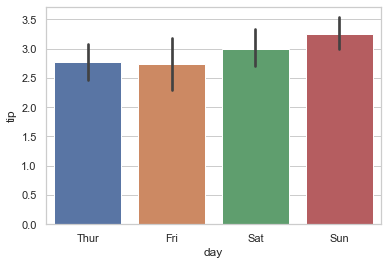

In [4]:
ax = sns.barplot(x="day", y="tip", data=tips)

In [5]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


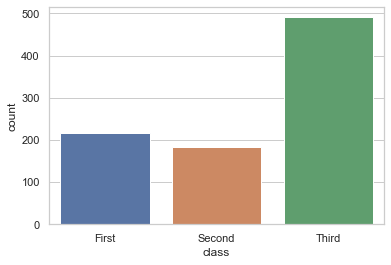

In [6]:
ax = sns.countplot(x="class", data=titanic)

In [67]:
# get connected to the database
connection = pg.connect(user='scientist',
                        password='Xh05@80yX',
                        host='127.0.01',
                        port='5432',
                        database='wn18')
 
df = psql.read_sql("SELECT * FROM entity", connection)

In [68]:
df

,synset_id,doc,pos_tag,sense_index,definition
0,14854262,stool,NN,2,solid excretory product evacuated from the bowels
1,00590383,chieftainship,NN,1,the position of chieftain
2,08769179,saxony,NN,1,an area in Germany around the upper Elbe river...
3,02338145,ondatra zibethica,NN,1,beaver-like aquatic rodent of North America wi...
4,01990168,founder,VB,2,sink below the surface
...,...,...,...,...,...
40938,03372656,lescol,NN,1,least expensive statin drug (trade name Lescol...
40939,01107359,affairs,NN,2,transactions of professional or public interes...
40940,05578740,tendon of achilles,NN,1,a large tendon that runs from the heel to the ...
40941,02040113,genus burhinus,NN,1,type genus of the Burhinidae: stone curlews


In [69]:
df.count()

synset_id      40943
doc            40943
pos_tag        40943
sense_index    40943
definition     40943
dtype: int64

In [70]:
dc = df.count()

In [71]:
dt = dc.to_frame()
dt

,0
synset_id,40943
doc,40943
pos_tag,40943
sense_index,40943
definition,40943


In [73]:
dt['index1'] = dt.index
dt

,0,index1
synset_id,40943,synset_id
doc,40943,doc
pos_tag,40943,pos_tag
sense_index,40943,sense_index
definition,40943,definition


In [74]:
for col in dt.columns:
    print(col)

0
index1


In [78]:
df = dt.rename(columns={0: "val", "index1": "lab"})
df

,val,lab
synset_id,40943,synset_id
doc,40943,doc
pos_tag,40943,pos_tag
sense_index,40943,sense_index
definition,40943,definition


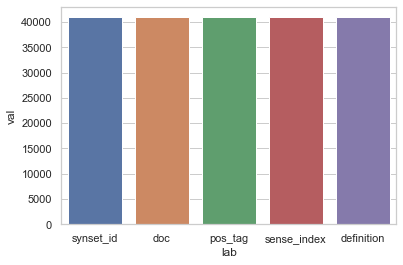

In [79]:
ax = sns.barplot(x="lab", y="val", data=df)

In [43]:
last = da.index[-1]
last

0

In [56]:
da = da.rename(index={last: 'count'})
da

,synset_id,doc,pos_tag,sense_index,definition
count,40943,40943,40943,40943,40943


In [58]:
df = pd.DataFrame({'lab':['A', 'B', 'C'], 'val':[10, 30, 20]})
df

,lab,val
0,A,10
1,B,30
2,C,20


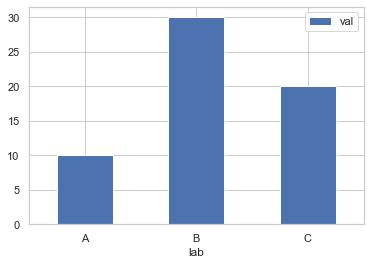

In [59]:
ax = df.plot.bar(x='lab', y='val', rot=0)